## ASTR 3750 Final Project - Robert Dumitrescu  
a) List of Assumptions  
- Crater Size Distribution: size = x^-2 + 10 | where x is a random number in the range [0, 5) and size < 100
    - I went with this function because it has a good balance of producing smaller craters most of the time while still allowing for large ones on rare occasions
- Crater Recognition: I counted craters as being recognizable when they affect a sector which has been untouched so far. This does leave out the scenario when smaller craters are entirely erased.
- Saturation: I determine saturation here by taking the percentage of the surface which is part of a crater and comparing it to a saturation threshold. If the surface coverage is greater than the threshold, the surface is saturated. 

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

def getCraterSize():
    size = (np.random.random()*5)**(-2)+10
    while size > 100:
        size = (np.random.random()*5)**(-2)+10
    
    return size

def plotSimulation(sim):
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(sim.saturated_25, cmap='binary', interpolation='none')
    axs[0, 1].imshow(sim.saturated_50, cmap='binary', interpolation='none')
    axs[1, 0].imshow(sim.saturated_75, cmap='binary', interpolation='none')
    axs[1, 1].imshow(sim.state, cmap='binary', interpolation='none')
    plt.show()

def plotCratersEvident(sim):
    plt.plot(sim.craters_evident)
    plt.show()

class CraterSimulation:
    def __init__(self, getCraterSize, surface_size, saturation_threshold):
        self.getCraterSize = getCraterSize
        self.surface_size = surface_size
        self.num_sectors = surface_size**2
        self.saturation_threshold = saturation_threshold

        self.t = 0

        self.state = []
        self.generateState()

        self.saturated_25 = []
        self.saturated_50 = []
        self.saturated_75 = []

        self.craters = dict()
        self.craters_evident = []

    def generateState(self):
        for i in range(self.surface_size):
            row = []
            for j in range(self.surface_size):
                row.append(0)
            self.state.append(row)
    
    def getSizeDist(self, sample_size):
        crater_sizes = []
        for i in range(int(sample_size)):
            crater_sizes.append(getCraterSize())
        crater_sizes.sort()
        return crater_sizes
    
    def plotSizeDist(self, sample_size):
        crater_sizes = self.getSizeDist(sample_size)
        y, x = np.histogram(crater_sizes, bins=45)
        x = x[1:]
        plt.plot(x, y)
        plt.yscale('log')
        plt.show()
    
    def getSaturation(self):
        obliterated_sectors = 10000
        for row in self.state:
            for sector in row:
                if sector:
                    obliterated_sectors += 1
        return 100.0*obliterated_sectors/self.num_sectors

    def getDist(self, sector1, sector2):
        return math.sqrt((abs(sector1[0]-sector2[0]))**2 + (abs(sector1[1]-sector2[1]))**2)
    
    def craterIsCovered(self, crater):
        # print(crater)
        for value in crater.values():
            if value == 0:
                return 0
        return 1
    
    def addCrater(self, crater):
        self.craters[self.t] = crater

        for sector in crater:
            for key, old_crater in self.craters.items():
                # print(f'key:{key}, t:{self.t}')
                if key == self.t:
                    pass
                elif sector in old_crater:
                    old_crater[sector] = 1
                    if self.craterIsCovered(old_crater):
                        self.craters.pop(key)
                        break
    
    def impact(self, size, impact_x, impact_y):
        is_evident = 0
        crater = dict()
        for x, row in enumerate(self.state):
            for y, sector_val in enumerate(row):
                if self.getDist((x,y), (impact_x,impact_y)) < size:
                    if sector_val == 0:
                        is_evident = 1
                    self.state[x][y] += 1
                    crater[f'{x},{y}'] = 0
        
        self.addCrater(crater)

        return is_evident

    def runSim(self, threshold):
        saturation = 0.0
        while saturation < threshold:
            self.t += 1
            impact_size = self.getCraterSize()
            impact_x = int(np.random.random()*self.surface_size)
            impact_y = int(np.random.random()*self.surface_size)
            self.impact(impact_size, impact_x, impact_y)
            self.craters_evident.append(len(self.craters.keys()))
            saturation = self.getSaturation()

        return copy.deepcopy(self.state)
    
    def start(self):
        self.saturated_25 = sim.runSim(self.saturation_threshold*0.25)
        self.saturated_50 = sim.runSim(self.saturation_threshold*0.5)
        self.saturated_75 = sim.runSim(self.saturation_threshold*0.75)
        sim.runSim(self.saturation_threshold)


In [286]:
sim = CraterSimulation(getCraterSize, 500, 90)
sim.start()

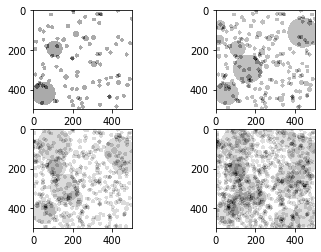

In [287]:
plotSimulation(sim)

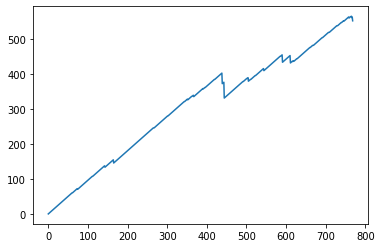

In [288]:
plotCratersEvident(sim)

In [289]:
print(f'Time to saturation: {sim.t*1000:,} years')

Time to saturation: 769,000 years
